# Clase 2: Guía de preprocesamiento [Parte 1]

Base de datos masivas (11088) - Curso 2024

Esta guia contiene ejemplos con Python y librerias como Pandas, Numpy, etc. para realizar tareas de la etapa de preprocesamiento y transformación de datos. Inicialmnete veremos algunos ejemplos de manejo de ruido y outliers, luego transformaciones como: normalización y discretización.

In [ ]:
# Librerias
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import zscore

## Manejo de ruido: Binning

In [ ]:
data = pd.DataFrame(
    {"medida":[2,3,1,2,4,6,3,7,1,9,5,8],
    "dia":[1,2,3,4,5,6,7,8,9,10,11,12]}
)

In [ ]:
# Cantidad de bins
n_bins = 3

Binning por igual-ancho

In [ ]:
data["binsEW"] = pd.cut(data.medida, bins=n_bins,  labels=[l for l in range(n_bins)])
medias = data.groupby("binsEW")["medida"].mean().values

calc = lambda x: medias[x]
data["medidaEW"] = data["binsEW"].apply(calc)

data

/tmp/ipython-input-4275947167.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medias = data.groupby("binsEW")["medida"].mean().values


,medida,dia,binsEW,medidaEW
0,2,1,0,2.0
1,3,2,0,2.0
2,1,3,0,2.0
3,2,4,0,2.0
4,4,5,1,5.0
5,6,6,1,5.0
6,3,7,0,2.0
7,7,8,2,8.0
8,1,9,0,2.0
9,9,10,2,8.0


Binning por igual-frecuencias

In [ ]:
freq = data.medida.shape[0]//n_bins
data_bin = pd.DataFrame(
    {"bins":sum([[b]*freq for b in range(n_bins)],[]),
    "medidaOrd":data.medida.sort_values()}
    )
medias = data_bin.groupby("bins").mean()

calc = lambda x: medias.values[x][0]
data_bin["medidaEF"] = data_bin["bins"].apply(calc)

dataBining = pd.concat([data, data_bin],axis=1)
dataBining = dataBining[["medida","medidaEW","medidaEF"]]

Graficando los binnings

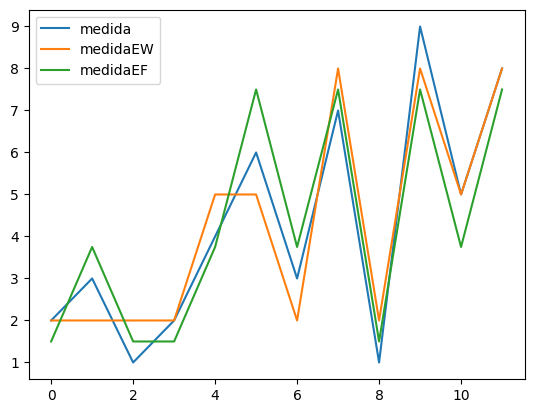

In [ ]:
dataBining['medidaEW'] = dataBining['medidaEW'].astype(float)
dataBining.plot()
plt.show()


## Utilizando Scikit Learn

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
disc = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

data["bins"] = disc.fit_transform(data["medida"].values.reshape(-1, 1))
data.bins.value_counts()

,count
bins,
0.0,4
1.0,4
2.0,4


## QQPlot

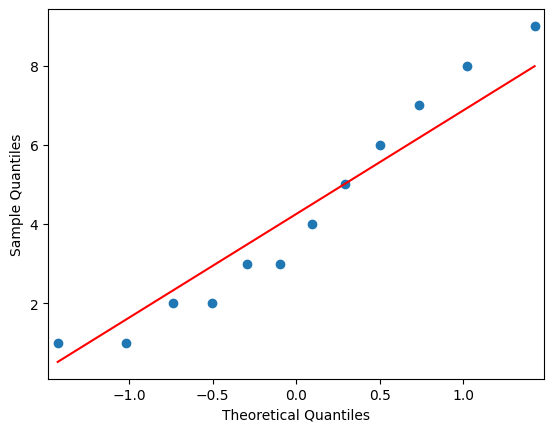

In [ ]:
sm.qqplot(data['medida'], line='s')
plt.show()

## Histograma

(array([4., 3., 1., 2., 2.]),
 array([1. , 2.6, 4.2, 5.8, 7.4, 9. ]),
 <BarContainer object of 5 artists>)

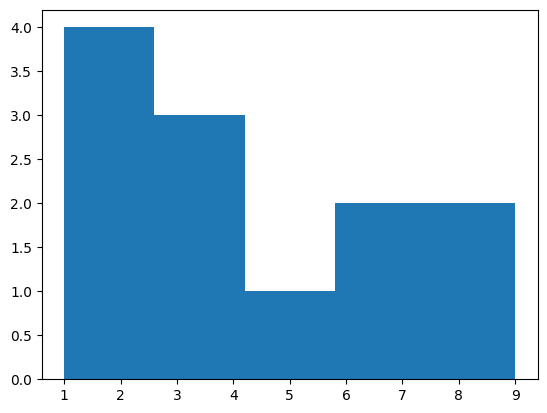

In [ ]:
plt.hist(data['medida'], bins=5)

## Boxplot

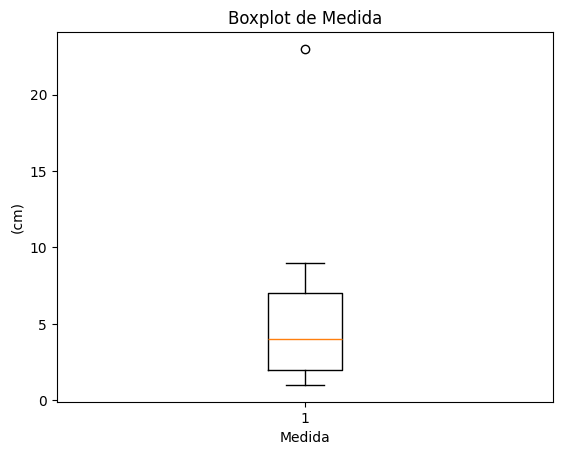

In [ ]:
plt.boxplot(data['medida'].dropna())
plt.xlabel('Medida')
plt.ylabel('(cm)')
plt.title('Boxplot de Medida')
plt.show()

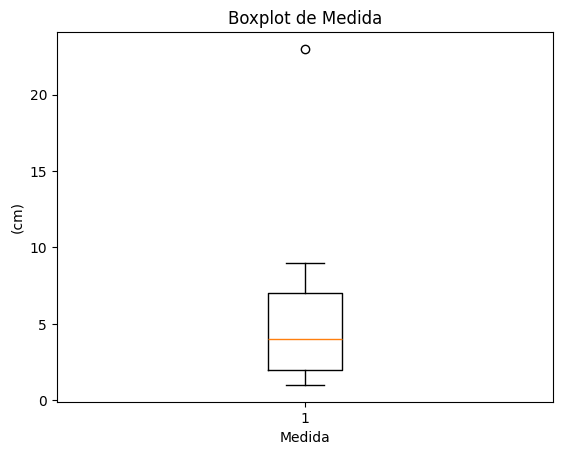

In [ ]:
data = pd.DataFrame(
    {"medida":[2,3,1,2,4,6,3,7,1,9,5,8,23],
    "dia":[1,2,3,4,5,6,7,8,9,10,11,12, 13]}
)
plt.boxplot(data['medida'].dropna())
plt.xlabel('Medida')
plt.ylabel('(cm)')
plt.title('Boxplot de Medida')
plt.show()

## Z-score

In [ ]:
data['medida_zscore'] = zscore(data['medida'].dropna())
data.head()

,medida,dia,medida_zscore
0,2,1,-0.660078
1,3,2,-0.481307
2,1,3,-0.838850
3,2,4,-0.660078
4,4,5,-0.302536


<Axes: >

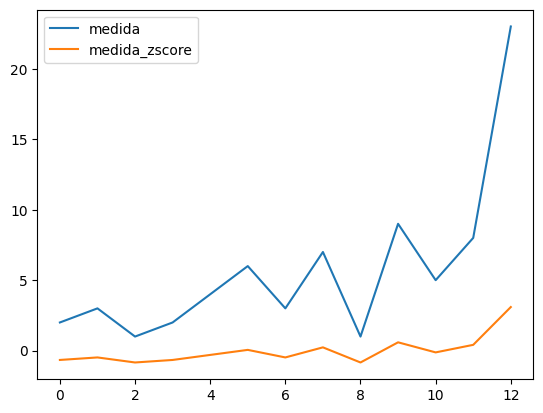

In [ ]:
data[['medida','medida_zscore']].plot()
